In [1]:
import requests
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt

OLLAMA_URL = "http://localhost:11434/v1/chat/completions"
MODEL_NAME = "granite4"


In [2]:
SYSTEM_PROMPT = """
You are a Smart Waste Segregation Assistant for India.

Goal:
Help users dispose waste correctly and safely.

Classify the given item into ONE category:
- Wet Waste
- Dry Waste (Recyclable)
- Dry Waste (Non-Recyclable)
- Hazardous Waste
- E-Waste

Bin color mapping:
Green = Wet Waste
Blue = Dry Waste
Red = Hazardous Waste
Yellow = E-Waste

You MUST return output in this exact format:

Category: <one category>
Bin: <Green/Blue/Red/Yellow>
Recyclable: <Yes/No/Depends>
Instruction: <1 short disposal instruction>
Tip: <1 sustainability tip>
Confidence: <High/Medium/Low>

Rules:
- Keep the response short and clear.
- If you are unsure, use Confidence: Low and say "Check local municipal rules".
- Do NOT ask for personal data.
"""


In [3]:
def ask_granite(item):
    payload = {
        "model": MODEL_NAME,
        "messages": [
            {"role": "system", "content": SYSTEM_PROMPT},
            {"role": "user", "content": f"Item: {item}"}
        ],
        "temperature": 0.2
    }

    response = requests.post(OLLAMA_URL, json=payload, timeout=180)
    response.raise_for_status()
    return response.json()["choices"][0]["message"]["content"]


In [4]:
def parse_output(text):
    data = {
        "Category": "",
        "Bin": "",
        "Recyclable": "",
        "Instruction": "",
        "Tip": "",
        "Confidence": ""
    }

    patterns = {
        "Category": r"Category:\s*(.*)",
        "Bin": r"Bin:\s*(.*)",
        "Recyclable": r"Recyclable:\s*(.*)",
        "Instruction": r"Instruction:\s*(.*)",
        "Tip": r"Tip:\s*(.*)",
        "Confidence": r"Confidence:\s*(.*)"
    }

    for key, pattern in patterns.items():
        match = re.search(pattern, text)
        if match:
            data[key] = match.group(1).strip()

    return data


In [5]:
def classify_item(item):
    raw = ask_granite(item)
    parsed = parse_output(raw)
    parsed["Item"] = item
    parsed["Timestamp"] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    parsed["Raw_Output"] = raw
    return parsed


In [6]:
def classify_bulk(items):
    results = []
    for item in items:
        print("Classifying:", item)
        results.append(classify_item(item))
    return pd.DataFrame(results)


In [7]:
test_items = [
    "banana peel",
    "plastic bottle",
    "chips packet",
    "battery",
    "used mask",
    "sanitary pad",
    "medicine strip",
    "broken glass",
    "old mobile phone",
    "cardboard",
    "tube light",
    "aluminium can",
    "food leftover",
    "thermocol",
    "paint container"
]

df = classify_bulk(test_items)
df


Classifying: banana peel
Classifying: plastic bottle
Classifying: chips packet
Classifying: battery
Classifying: used mask
Classifying: sanitary pad
Classifying: medicine strip
Classifying: broken glass
Classifying: old mobile phone
Classifying: cardboard
Classifying: tube light
Classifying: aluminium can
Classifying: food leftover
Classifying: thermocol
Classifying: paint container


,Category,Bin,Recyclable,Instruction,Tip,Confidence,Item,Timestamp,Raw_Output
0,Wet Waste,Green,No,Throw in the green waste bin.,Compost banana peels to enrich soil nutrients.,,banana peel,2026-01-17 20:52:49,Category: Wet Waste\nBin: Green\nRecyclable: N...
1,Dry Waste (Non-Recyclable),Blue,No,Dispose in the blue bin.,Reduce plastic use by opting for reusable bott...,High,plastic bottle,2026-01-17 20:53:02,Category: Dry Waste (Non-Recyclable)\nBin: Blu...
2,Dry Waste (Recyclable),Blue,Yes,Place the empty chip packet in your blue recyc...,Rinse out any remaining contents before recycl...,,chips packet,2026-01-17 20:53:15,Category: Dry Waste (Recyclable)\nBin: Blue\nR...
3,E-Waste,Red,Yes,Dispose of the battery in a designated e‑waste...,Consider recycling or donating old batteries t...,High,battery,2026-01-17 20:53:28,Category: E-Waste\nBin: Red\nRecyclable: Yes\n...
4,Hazardous Waste,Red,No,Dispose of the used mask in your regular trash...,Properly dispose of masks to prevent contamina...,,used mask,2026-01-17 20:53:43,Category: Hazardous Waste\nBin: Red\nRecyclabl...
5,Hazardous Waste,Red,No,Dispose of sanitary pads in the red hazardous ...,Wrap them securely before disposal to prevent ...,,sanitary pad,2026-01-17 20:53:55,Category: Hazardous Waste\nBin: Red\nRecyclabl...
6,Hazardous Waste,Red,No,Dispose of in the hazardous waste bin provided...,Keep medicines out of children's reach and fol...,,medicine strip,2026-01-17 20:54:06,Category: Hazardous Waste\nBin: Red\nRecyclabl...
7,Hazardous Waste,Red,No,"Place in a sturdy, puncture-proof container be...",Sharps like broken glass should never be place...,,broken glass,2026-01-17 20:54:19,Category: Hazardous Waste\nBin: Red\nRecyclabl...
8,E-Waste,Yellow,Yes,Place the old mobile phone in the yellow e‑was...,Remove SIM cards and memory sticks before recy...,,old mobile phone,2026-01-17 20:54:31,Category: E-Waste\nBin: Yellow\nRecyclable: Ye...
9,Dry Waste (Recyclable),Blue,Yes,Place in the blue recycling bin.,Flatten cardboard boxes before recycling to sa...,High,cardboard,2026-01-17 20:54:42,Category: Dry Waste (Recyclable)\nBin: Blue\nR...


In [8]:
category_counts = df["Category"].value_counts()
category_counts


Category
Hazardous Waste               5
Dry Waste (Recyclable)        3
E-Waste                       3
Wet Waste                     2
Dry Waste (Non-Recyclable)    2
Name: count, dtype: int64

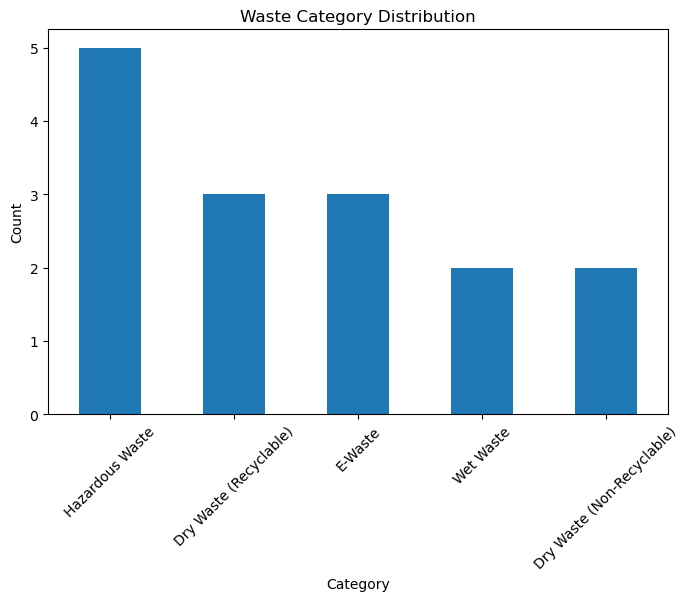

In [9]:
plt.figure(figsize=(8,5))
category_counts.plot(kind="bar")
plt.title("Waste Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [10]:
df.to_csv("smart_waste_segregation_results.csv", index=False)
print("Saved: smart_waste_segregation_results.csv")


Saved: smart_waste_segregation_results.csv


In [11]:
WASTE_RULES_DOC = """
Waste Segregation Reference Rules (India - General):
1) Wet Waste: food scraps, fruit peels, tea leaves, vegetable waste.
2) Dry Waste (Recyclable): paper, cardboard, metal cans, plastic bottles, glass bottles.
3) Dry Waste (Non-Recyclable): multi-layer packets (chips), thermocol, contaminated plastics.
4) Hazardous Waste: used masks, sanitary pads, syringes, blades, chemicals, expired medicines.
5) E-Waste: batteries, chargers, phones, tube lights, electronic parts.
Bin Colors:
Green=Wet, Blue=Dry, Red=Hazardous, Yellow=E-waste.
"""


In [12]:
def ask_granite_with_doc(item):
    payload = {
        "model": MODEL_NAME,
        "messages": [
            {"role": "system", "content": SYSTEM_PROMPT},
            {"role": "document", "content": WASTE_RULES_DOC},
            {"role": "user", "content": f"Item: {item}"}
        ],
        "temperature": 0.2
    }

    response = requests.post(OLLAMA_URL, json=payload, timeout=180)
    response.raise_for_status()
    return response.json()["choices"][0]["message"]["content"]


In [13]:
print(ask_granite_with_doc("tube light"))


Category: E-Waste
Bin: Yellow
Recyclable: Yes
Instruction: Place tube light in yellow bin.
Tip: Dispose of tube lights at a designated e-waste collection center to ensure proper recycling and environmental safety.
Confidence: High
